# Code Week - Toulouse Data Science
## Atelier découverte de la Data Science
### _N. Salaün-Penquer (trésorière TDS)_
### _N. Decoster_ (membre de la compagnie du COde


In [1]:
from math import *
from decimal import Decimal 
from __future__ import division 
import random
import csv
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

#### Lien des slides https://docs.google.com/presentation/d/1H5-EJA7-nXJIcGSX2-KCuAYbsBOBHrPjhh5zkfFj3ew/edit?usp=sharing

## Classification non supervisée

**_Définition_**: Les classifications non supervisées sont des classifications qui construisent leurs clusters en se basant uniquement sur la donnée. 

**_Objectifs_**: Observer, sans a priori la présence de groupes.

**_Méthodes les plus connues_**: 

* Kmeans
* Classification hierarchique ascendante
* Dbscan
* Pam


### A- Kmeans

In [12]:
# Initialisation d'un data
data = [[random.randint(1,10),random.randint(1,10)] for _ in range(20)]
# data

In [2]:
# kmeans_versionSimpliste(dataSet,nbClusters,fonctionDistance,nbIterMax)
# paramètres:
    # dataSet: liste de points
    # nbClusters: nb classes
    # fonctionDistance: une fonction de distance -euclidienne -manhattan
    # nbIterMax: itération max (pour éviter de tourner en rond)
# Sortie: liste de classes (clusters sous forme de liste, donc liste dans une liste)
# visu6max(data,nbCluster,listeClasse)
# paramètres:
    # data: liste de points
    # nbClusters: nb classes
    # listeClasse: liste des classes 
# Pas de sortie mais plot des données
print('A vous de jouer!')
print('Mais avant: descendez qlq blocs plus bas et exécuter le bloc "Définition des fonctions" ')

A vous de jouer!
Mais avant: descendez qlq blocs plus bas et exécuter le bloc "Définition des fonctions" 


In [ ]:
###
# Manipulation de la fonction Kmeans et de la visualisation#
###

In [4]:
# Exemple d'un cas pratique, un professeur souhaite construire X groupe homogène en fonction des notes des élèves
#with open('exemple.csv', 'rb') as f:
#    dataSet = [[int(x) for x in rec] for rec in csv.reader(f, delimiter=';')]
#print('A vous de jouer!')

In [ ]:
###
# Utilisation sur un cas réel #
###

## On s'y met?!
### L'implémentation de la fonction

Vous connaissez l'algo? A vous de jouer!

In [5]:
print('On vous aide un peu :) ')
def kmeansTest(data, nbC, fonctionD, iterMax):
    dimD=len(data[0])
    fin=1
    nbIteration=0
    # Ajout de la fonction de construction des centroides 
    #centroidesInit=
    # Boucle tant que
    while nbIteration < iterMax and fin:
        # fonction initialisation des classes
        # nvClasse=
        # fonction de classement des points (listeClasse, listeCentroides, listePoints, fonctionDistance)
        # nvClasse= 
        # fonction de calcul du nouveau centroïde de chaque classe
        # centroidesNv,fin=
        # si les barycentres n'ont pas bougé
        if centroidesNv==centroidesInit:
            fin=0
        if fin:
                centroidesInit=centroidesNv
        nbIteration+=1
    if nbIteration==iterMax:
        print('nb itération max')
    return nvClasse
print('Ajoutez les fonctions avec les bons paramètres')
print('Le détail des fonctions se trouve dans le bloc suivant')

On vous aide un peu :) 
Ajoutez les fonctions avec les bons paramètres
Le détail des fonctions se trouve dans le bloc suivant


**initialisationCentroides** (dim, nbClusters) : Initialise des centroïdes aléatoires (entiers compris entre 1 et 20)
    # dim: dimension
    # nbClusters: nb de classes choisies
**initialisationClasses** (nbClusters): Initialise _nbClusters_ classes vides 
    # nbClusters: nb de classes choisies
**constructionClasses** (listeClasse, listeCentroides, listePoints, fonctionDistance): construit les classes en fonction de la distance de chaque point aux centroïdes
    # listeClasse : liste initialisée et vide des classes
    # listeCentroides: liste des centroïdes
    # listePoints: Data set
    # fonctionDistance: distanceEuclidienne ou distanceManhattan
**calculCentroides** (listeClasse): calcul les nouveaux centroïdes + vérifie qu'aucun groupe n'est vide
    # listeClasse: classes construites
  
  Deux sorties: une liste de classe et un entier qui indique si une classe est vide

In [8]:
print('Et sinon: lancez-vous dans l\'implémentation des sous fonctions!')

def maDistanceE(A,B):
    return 0

def maDistanceM(A,B):
    return 0

def monInitClasses(dim, nbClusters):
    return 0

print('Et on continue :) ') 



Et sinon: lancez-vous dans l'implémentation des sous fonctions!
Et on continue :) 


## Les limites de l'algo
### 1- Data de type numérique (passage par des matrices de similarité)
### 2- Nb de classes à préciser 
### 3- Construction de classes parfois différentes
### 4- Mauvais classement pour certains types de data

In [ ]:
# Exemple d'un mauvais classement cf les slides

# A exécuter : fonctions outils

In [15]:
##################################
#### DEFINITION DES FONCTIONS ####
##################################

def barycentre(listeP):
    nbE=len(listeP)
    dim=len(listeP[0])
    centre=[0]*dim
    for i in range (nbE):
        for j in range(dim):
            centre[j]+=listeP[i][j]
            j+=1
        i+=1
    return [i/nbE for i in centre]

# Calcul des centroides aléatoires
def centroidesAleatoire(dim):
    res=[]
    for i in range(dim):
        res+=[random.randint(1,10)]
    return res

def initialisationClasses(nbClusters):
    return [[] for _ in range(nbClusters)]

def constructionClasses(listeClasse, listeCentroides, listePoints, fonctionDistance):
    nbC=len(listeCentroides)
    nbP=len(listePoints)
    for i in range(nbP):
        # distance du point avc le premier centroide
        d1=[fonctionDistance(listeCentroides[0],listePoints[i]),0]
        j=1
        while j < nbC:
            d2=fonctionDistance(listeCentroides[j],listePoints[i])
            if d2 < d1[0]:
                d1=[d2,j]
            j+=1
        listeClasse[d1[1]]+=[listePoints[i]]
        i+=1
    return listeClasse

def calculCentroides(listeClasse):
    nbC=len(listeClasse)
    nvCentroide=[]
    ok=1
    for i in range(nbC):
        if len(listeClasse[i]):
            nvCentroide+=[barycentre(listeClasse[i])]
        else:
            print('Une classe est vide')
            nvCentroide+=[[ [] for _ in range(nbC)]]
            ok=0
    return nvCentroide, ok

def initialisationCentroides(dim, nbCluster):
    return [centroidesAleatoire(dim) for _ in range(nbCluster)]

# Définition du Kmeans revoir le nb de cluster
def kmeans_versionSimpliste(data, nbClusters, fonctionDistance, iterMax):
    dimD=len(data[0])
    fin=1
    nbIteration=0
    # fonction de construction des centroides 
    centroidesInit=initialisationCentroides(dimD,nbClusters)
    # Boucle tant que
    while nbIteration < iterMax and fin:
        # fonction initialisation des classes
        nvClasse=initialisationClasses(nbClusters)
        # fonction de classement des points (listeClasse, listeCentroides, listePoints, fonctionDistance)
        nvClasse= constructionClasses(nvClasse,centroidesInit,data,fonctionDistance)
        # fonction de calcul du nouveau centroïde de chaque classe
        centroidesNv,fin=calculCentroides(nvClasse)
        if centroidesNv==centroidesInit:
            fin=0
        if fin:
                centroidesInit=centroidesNv
        nbIteration+=1
    if nbIteration==iterMax:
        print('nb itération max')
    return nvClasse

# Définition d'une fonction de distance
# Distance Euclidienne
# La plus basique, c'est la longeur du trait qui permet de relier deux points entre eux
def distanceEuclidienne(A,B):
    return sqrt(pow(B[0]-A[0],2)+pow(B[1]-A[1],2))
# Distance de Manhattan
# appelée aussi taxi-distance3, est la distance entre deux points parcourue par un taxi 
#lorsqu'il se déplace dans une ville où les rues sont agencées selon un réseau ou quadrillage
def distanceManhattan(A,B):
    return abs(B[0]-A[0])+abs(B[1]-A[1])
# Différence entre les distances


# Définitions plus complètes 
# def manhattan_distance(x,y):
#    return sum(abs(a-b) for a,b in zip(x,y))
# def euclidean_distance(x,y):
#    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
# def minkowski_distance(x,y,p_value):
#    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
# Définition sous fonctions
# def nth_root(value, n_root):
#    root_value = 1/float(n_root)
#    return round (Decimal(value) ** Decimal(root_value),3)

# Exemples
#print(manhattan_distance(data[1],data[0]))
#print(euclidean_distance(data[1],data[0]))
#print (minkowski_distance(data[1],data[0],2))

# http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
# Distance par mesure de cosinus et distance de Jaccard

def visu6max(data,nbCluster,listeClasse):
    nbE=len(data)
    dim=len(data[0])
    listeL=[[] for _ in range(dim)]
    classeF=[]
    for i in range(nbE):
            for j in range(dim):
                listeL[j]+=[data[i][j]]
            for k in range(nbCluster):
                if (data[i] in listeClasse[k]):
                    classeF+=[k]
    classeF  
    a = np.array(listeL)
    categories = np.array(classeF)
    colormap = np.array(['r','g','b','y','k','pink'])
    plt.scatter(a[0], a[1], s=100, c=colormap[categories])
    #plt.savefig('ScatterClassPlot.png')
    plt.show()

In [ ]:
## BCP de détails non vu
# Nettoyage du Data:
    # traitement des var incohérentes
    # traitement des valeurs vides
    # traitement des erreurs (encodage)
# Stat de vérif
# Et bien plus encore!

In [ ]:
# Encore mieux: scikit learn!
# http://scikit-learn.org/stable/

### Solutions

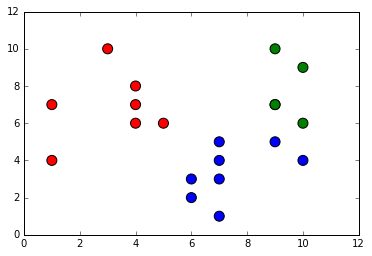

In [16]:
# Solutions;
visu6max(data,3,kmeans_versionSimpliste(data,3, distanceEuclidienne, 10))

Une classe est vide


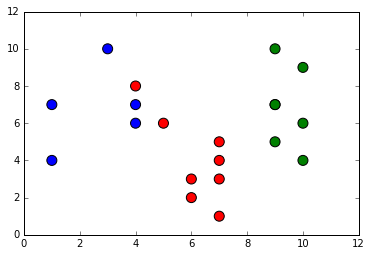

In [17]:
visu6max(data,4,kmeans_versionSimpliste(data,4, distanceEuclidienne, 10))

In [10]:
#kmeans_versionSimpliste(dataSet,2,distanceEuclidienne,10)

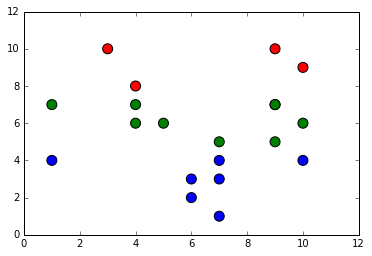

In [13]:
classe=kmeans_versionSimpliste(data, 3, distanceEuclidienne, 10)
visu6max(data,3,classe)

In [14]:
print('Pour la solution des fonctions: fouillez donc dans le bloc de définition de fonction ;) ')

Pour la solution des fonctions: fouillez donc dans le bloc de définition de fonction ;) 
